In [1]:
import numpy as np
import pandas as pd

In [2]:
# df=pd.read_csv('/content/reddit_preprocessing.csv')
path="/content/drive/MyDrive/reddit_preprocessing.csv"
df=pd.read_csv(path)
df.head()

,clean_comment,category
0,family mormon never tried explain still stare ...,1
1,buddhism much lot compatible christianity espe...,1
2,seriously say thing first get complex explain ...,-1
3,learned want teach different focus goal not wr...,0
4,benefit may want read living buddha living chr...,1


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df.shape

(36793, 2)

In [5]:
df.sample()['clean_comment'].values

array(['chowkidaar chor hai'], dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36793 entries, 0 to 36792
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  36662 non-null  object
 1   category       36793 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 575.0+ KB


In [7]:
df.isnull().sum()

,0
clean_comment,131
category,0


In [8]:
df[df['clean_comment'].isnull()]

,clean_comment,category
287,NaN,0
821,NaN,0
922,NaN,0
934,NaN,0
1169,NaN,0
...,...,...
36358,NaN,0
36563,NaN,0
36599,NaN,0
36731,NaN,0


In [9]:
df.dropna(inplace=True)

In [10]:
df.duplicated().sum()

np.int64(419)

In [11]:
df[df.duplicated()]

,clean_comment,category
1376,jpg,0
1397,good,1
1430,real bhagoda,1
1561,think,0
2340,cringe,0
...,...,...
36751,nice try,1
36768,vote,0
36770,would,0
36776,nice try,1


In [12]:
df.drop_duplicates(inplace=True)

In [13]:

df.duplicated().sum()

np.int64(0)

In [14]:
df[(df['clean_comment'].str.strip()=='')]

,clean_comment,category


In [15]:
df=df[~(df['clean_comment'].str.strip()=='')]

In [16]:
df['clean_comment']=df['clean_comment'].str.lower()
df.head()

,clean_comment,category
0,family mormon never tried explain still stare ...,1
1,buddhism much lot compatible christianity espe...,1
2,seriously say thing first get complex explain ...,-1
3,learned want teach different focus goal not wr...,0
4,benefit may want read living buddha living chr...,1


In [17]:
df[df['clean_comment'].apply(lambda x: x.endswith(' ') or x.startswith(' '))]

,clean_comment,category


In [18]:
df['clean_comment']=df['clean_comment'].str.strip()
df['clean_comment'].apply(lambda x: x.endswith(' ') or x.startswith(' ')).sum()

np.int64(0)

In [19]:
url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
comments_with_urls = df[df['clean_comment'].str.contains(url_pattern, regex=True)]
comments_with_urls.head()

,clean_comment,category


In [20]:
#Identify comments containing new line characters
comments_with_newlines = df[df['clean_comment'].str.contains('\n')]
#Display the comments with newline characters
comments_with_newlines.head()

,clean_comment,category


In [21]:
#Remove the new line characters from 'clean_comment' column
df['clean_comment'] = df['clean_comment'].str.replace('\n', ' ',regex=True)

#Verify the transformation by checking for any remaining new lines
comments_with_newlines_remaining = df[df['clean_comment'].str.contains('\n')]
comments_with_newlines_remaining

,clean_comment,category


# **Exploratory Data Analysis**

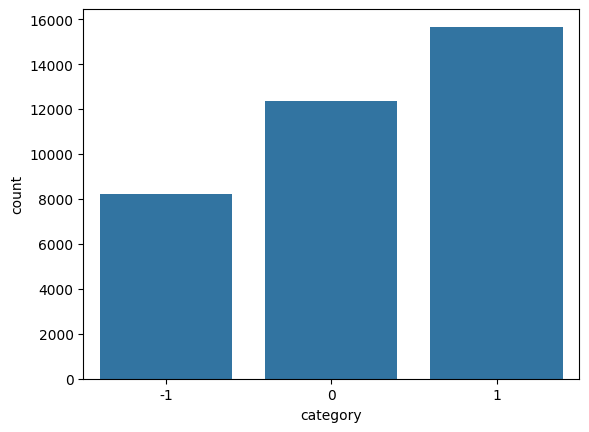

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

#distribution of classes
sns.countplot(x='category',data=df)
plt.show()

In [23]:
#frequency distribution of senntiments
df['category'].value_counts(normalize=True).mul(100).round(2)

,proportion
category,
1,43.22
0,34.15
-1,22.63


In [24]:
df['word_count']=df['clean_comment'].apply(lambda x: len(x.split()))
df.head()

,clean_comment,category,word_count
0,family mormon never tried explain still stare ...,1,26
1,buddhism much lot compatible christianity espe...,1,140
2,seriously say thing first get complex explain ...,-1,46
3,learned want teach different focus goal not wr...,0,15
4,benefit may want read living buddha living chr...,1,68


In [25]:
df['word_count'].describe()

,word_count
count,36243.000000
mean,20.370085
std,39.298392
min,1.000000
25%,5.000000
50%,9.000000
75%,21.000000
max,893.000000


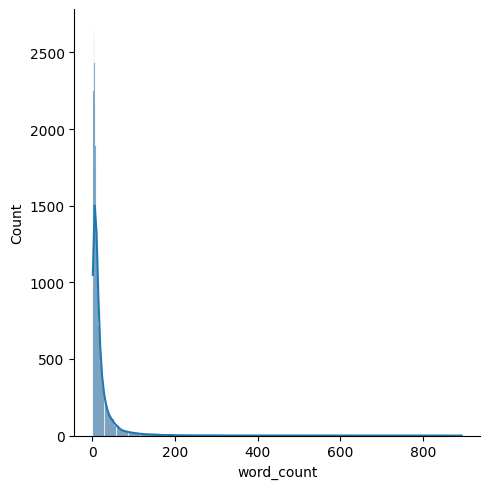

In [26]:
sns.displot(df['word_count'],kde=True)

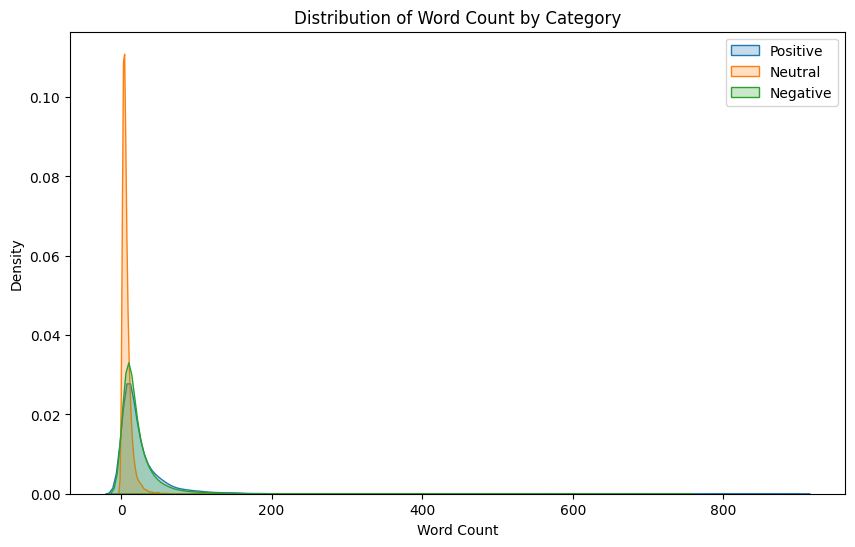

In [27]:
#create the figure and axis
plt.figure(figsize=(10,6))

#plot KDE for category 1
sns.kdeplot(df[df['category']==1]['word_count'],label='Positive',fill=True)
#plot KDE for category 0
sns.kdeplot(df[df['category']==0]['word_count'],label='Neutral',fill=True)
#plot KDE for category -1
sns.kdeplot(df[df['category']==-1]['word_count'],label='Negative',fill=True)

#Add titles and Labels
plt.title('Distribution of Word Count by Category')
plt.xlabel('Word Count')
plt.ylabel('Density')

#Add a legend
plt.legend()

#Show the plot
plt.show()

Positive comments(Category 1): These tends to have a wider spread in word count, indicating that longer comments are more common in positive sentiments.
Neutral comments(Category 0): The distribution shows a relatively lower frequency and is more concentrated around shorter comments compared to positive or negative ones.
Negative comments(Category -1): These comments have a distribution somewhat similar to positive comments but with a smaller proportion of longer comments.

<Axes: ylabel='word_count'>

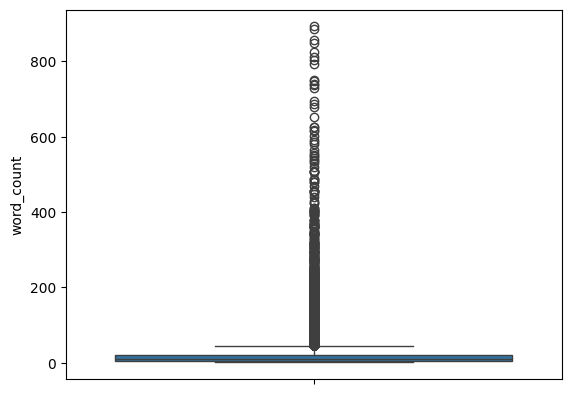

In [28]:
sns.boxplot(df['word_count'])

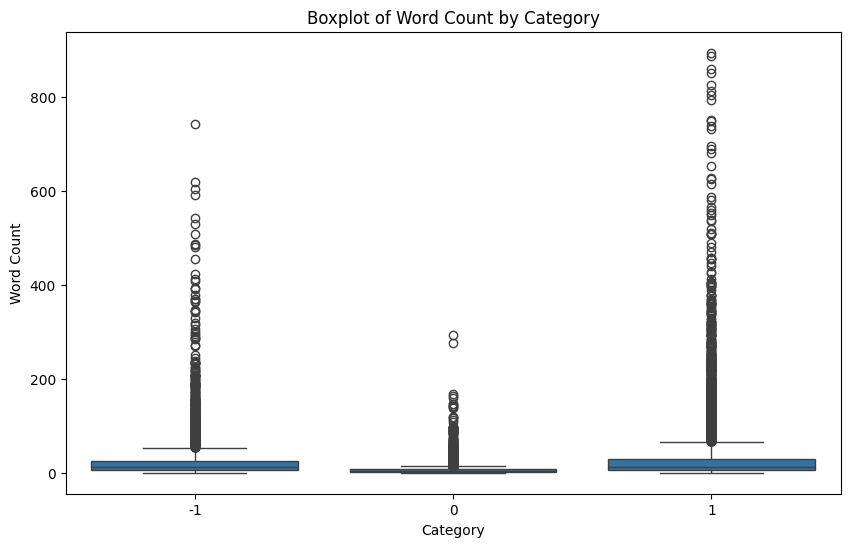

In [29]:
#create a boxplot for the 'wordcount' column category
plt.figure(figsize=(10,6))
sns.boxplot(x='category',y='word_count',data=df)
plt.title('Boxplot of Word Count by Category')
plt.xlabel('Category')
plt.ylabel('Word Count')
plt.show()

<Axes: xlabel='category', ylabel='word_count'>

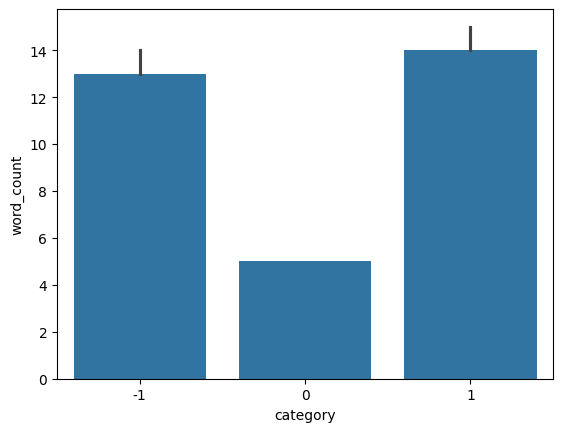

In [30]:
#median word counts among sentiments

sns.barplot(x='category',y='word_count',data=df, estimator='median')

In [31]:
!pip install nltk

In [32]:
from nltk.corpus import stopwords

#Download NLTK stopwords if not already download
import nltk
nltk.download('stopwords')

#Define the list of English stopwords
stop_words=set(stopwords.words('english'))

#create a new column 'num_stop_words' by counting the numbers of stopwords in each comment
df['num_stop_words']=df['clean_comment'].apply(lambda x: len([word for word in x.split() if word.lower() in stop_words]))
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,clean_comment,category,word_count,num_stop_words
0,family mormon never tried explain still stare ...,1,26,0
1,buddhism much lot compatible christianity espe...,1,140,3
2,seriously say thing first get complex explain ...,-1,46,0
3,learned want teach different focus goal not wr...,0,15,1
4,benefit may want read living buddha living chr...,1,68,1


Text(0, 0.5, 'Frequency')

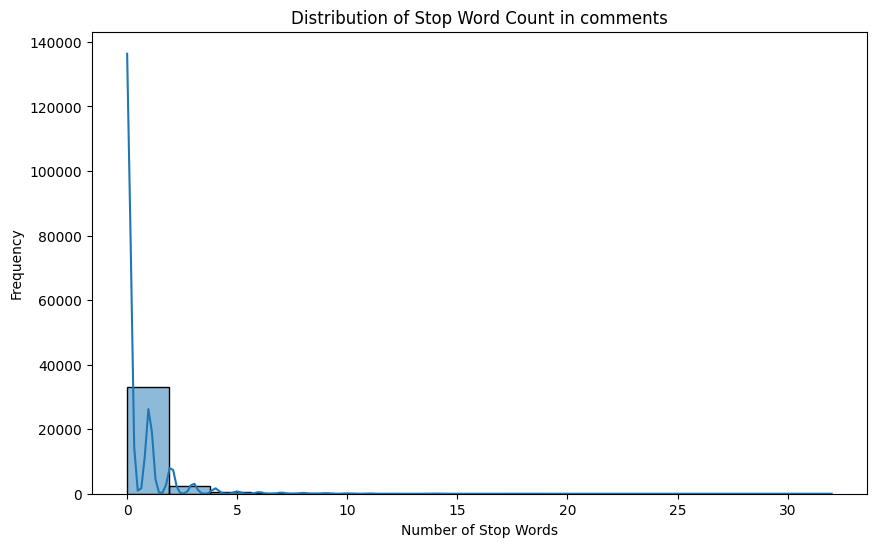

In [33]:
#create a distribution plot(displot) for the 'num_stop_words' column
plt.figure(figsize=(10,6))
sns.histplot(df['num_stop_words'],kde=True)
plt.title('Distribution of Stop Word Count in comments')
plt.xlabel('Number of Stop Words')
plt.ylabel('Frequency')

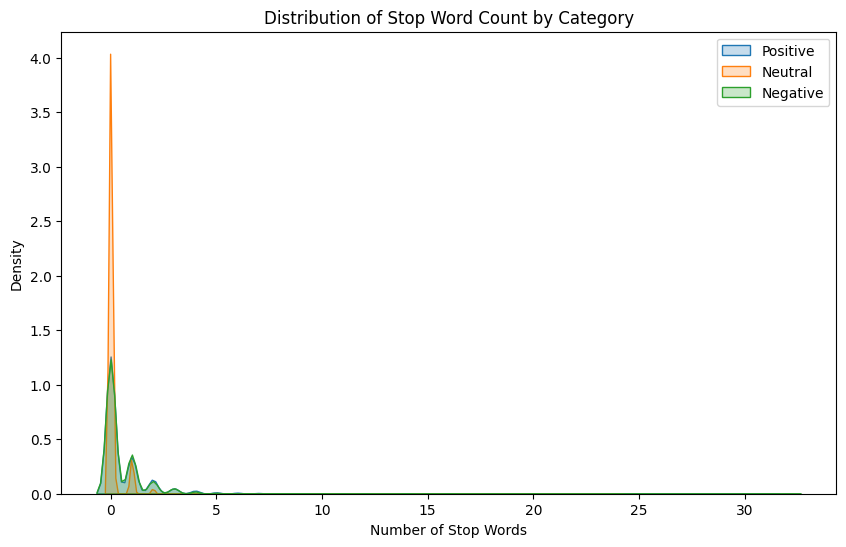

In [34]:
#create the figure and axes
plt.figure(figsize=(10,6))

#plot KDE for category 1
sns.kdeplot(df[df['category']==1]['num_stop_words'],label='Positive',fill=True)

#plot KDE for category 0
sns.kdeplot(df[df['category']==0]['num_stop_words'],label='Neutral',fill=True)

#plot KDE for category -1
sns.kdeplot(df[df['category']==-1]['num_stop_words'],label='Negative',fill=True)

#Add title and labels
plt.title('Distribution of Stop Word Count by Category')
plt.xlabel('Number of Stop Words')
plt.ylabel('Density')

plt.legend()
plt.show()

<Axes: xlabel='category', ylabel='num_stop_words'>

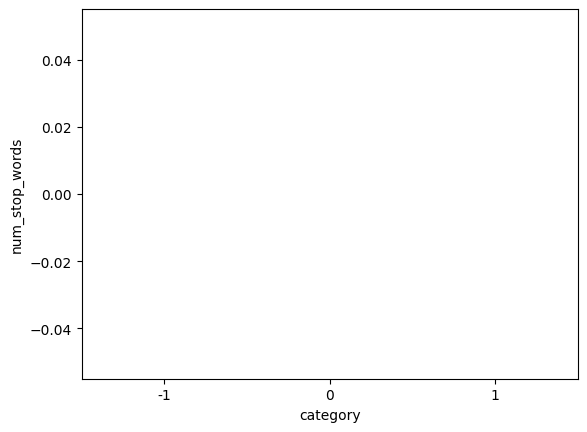

In [35]:
#median word count among sentiments
sns.barplot(df,x='category',y='num_stop_words',estimator='median')

/tmp/ipython-input-1156332245.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_df, x='count', y='stop_word', palette='viridis')


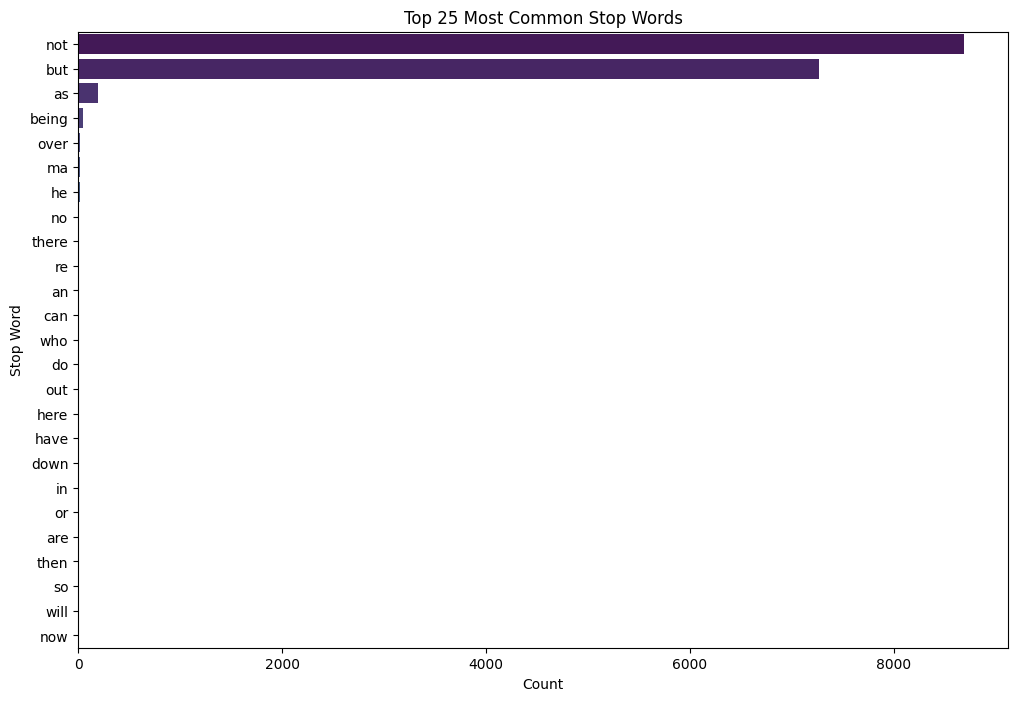

In [36]:
#create a frequency distribution of stop words in the 'clean_comment' column
from collections import Counter

#Extract all stop words from the comments using the previously defined 'common_stopwords'
all_stop_words=[word for comment in df['clean_comment'] for word in comment.split() if word in stop_words]

#count the most common stop_words
most_common_stop_words = Counter(all_stop_words).most_common(25)

# convert the most common stop words to a dataframe for plotting
top_25_df = pd.DataFrame(most_common_stop_words, columns=['stop_word', 'count'])

#create the barplot for the top 25 most common stop words
plt.figure(figsize=(12,8))
sns.barplot(data=top_25_df, x='count', y='stop_word', palette='viridis')
plt.title('Top 25 Most Common Stop Words')
plt.xlabel('Count')
plt.ylabel('Stop Word')
plt.show()

In [37]:
df['nums_chars']=df['clean_comment'].apply(len)
df.head()


,clean_comment,category,word_count,num_stop_words,nums_chars
0,family mormon never tried explain still stare ...,1,26,0,196
1,buddhism much lot compatible christianity espe...,1,140,3,981
2,seriously say thing first get complex explain ...,-1,46,0,275
3,learned want teach different focus goal not wr...,0,15,1,101
4,benefit may want read living buddha living chr...,1,68,1,473


In [38]:
df['nums_chars'].describe()

,nums_chars
count,36243.000000
mean,137.249510
std,275.903402
min,2.000000
25%,30.000000
50%,62.000000
75%,138.000000
max,6583.000000


In [39]:
from collections import Counter
all_text=' '.join(df['clean_comment'])
char_frequency=Counter(all_text)
char_frequency_df=pd.DataFrame(char_frequency.items(),columns=['character','frequency']).sort_values(by='frequency',ascending=False)
char_frequency_df.head()

,character,frequency
6,,738272
10,e,494884
1,a,365250
3,i,342812
12,t,322572


In [40]:
char_frequency_df['character'].values

array([' ', 'e', 'a', 'i', 't', 'n', 'o', 'r', 's', 'l', 'd', 'c', 'm',
       'p', 'u', 'g', 'h', 'y', 'b', 'k', 'w', 'f', 'v', 'j', 'x', '0',
       'z', 'q', '1', '2', '9', '5', '3', '4', '6', '7', '8'],
      dtype=object)

In [41]:
char_frequency_df.tail(50)

,character,frequency
6,,738272
10,e,494884
1,a,365250
3,i,342812
12,t,322572
9,n,317572
7,o,290894
8,r,268331
16,s,223259
4,l,217592


In [42]:
#create a new column 'num_punctuation_chars' to count punctuation characters in each comment
df['num_punctuation_chars']=df['clean_comment'].apply(lambda x: sum([1 for char in x if char in '.,!?;:"\'()[]{}-']))
df.sample(5)

,clean_comment,category,word_count,num_stop_words,nums_chars,num_punctuation_chars
32805,one hell comedian kyaa subah subah nasha,0,7,0,40,0
3559,maybe mom afraid losing jacket,-1,5,0,30,0
17180,trump dismantled entire legacy year entire kab...,-1,19,1,130,0
12941,pakistan still small heart flag,-1,5,0,31,0
30756,look like taxi driver threatened taxi driver a...,-1,10,0,61,0


In [43]:
df['num_punctuation_chars'].describe()

,num_punctuation_chars
count,36243.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


/tmp/ipython-input-2482730572.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_bigrams_df,x='count',y='bigram',palette='magma')


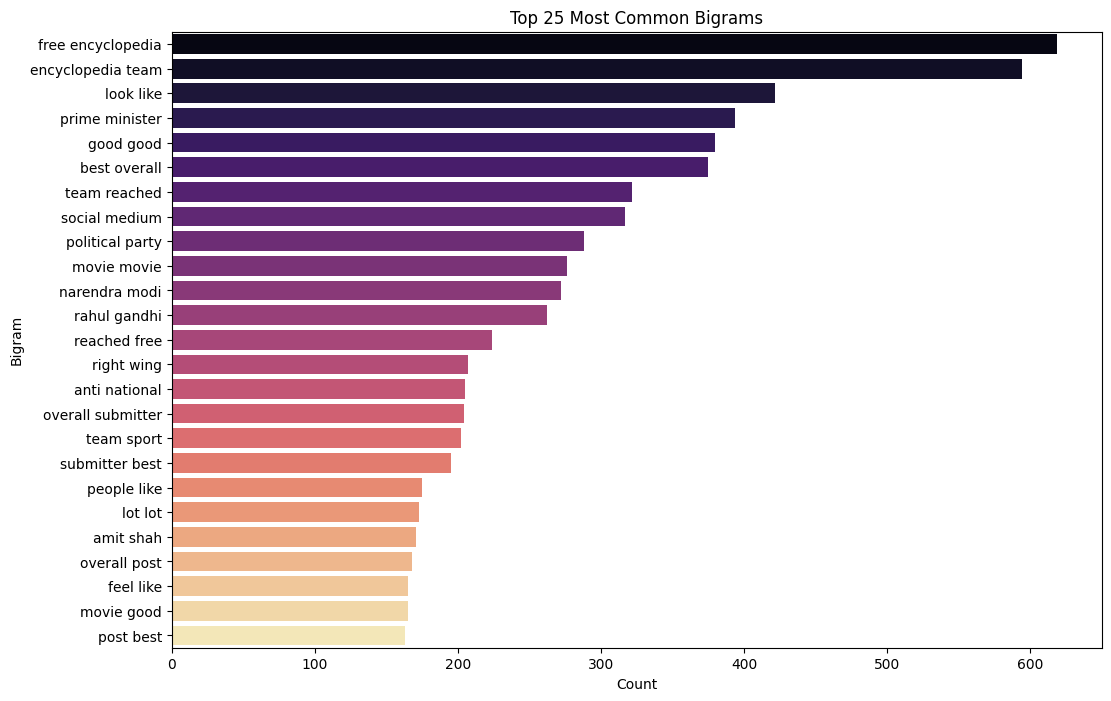

In [44]:
from sklearn.feature_extraction.text import CountVectorizer

#create a function to extract the top 25 bigrams
def get_top_ngrams(corpus,n=None):
  vec=CountVectorizer(ngram_range=(2,2), stop_words='english').fit(corpus)
  bag_of_words=vec.transform(corpus)
  sum_words=bag_of_words.sum(axis=0)
  words_freq=[(word,sum_words[0,idx]) for word,idx in vec.vocabulary_.items()]
  words_freq=sorted(words_freq,key=lambda x: x[1],reverse=True)
  return words_freq[:n]

#get the top 25 bigrams
top_25_bigrams=get_top_ngrams(df['clean_comment'],25)

#convert the bigrams into a dataframe for plotting
top_25_bigrams_df=pd.DataFrame(top_25_bigrams,columns=['bigram','count'])

#plot the counterplot fro the top 25 bigrams
plt.figure(figsize=(12,8))
sns.barplot(data=top_25_bigrams_df,x='count',y='bigram',palette='magma')
plt.title('Top 25 Most Common Bigrams')
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.show()

/tmp/ipython-input-786880100.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


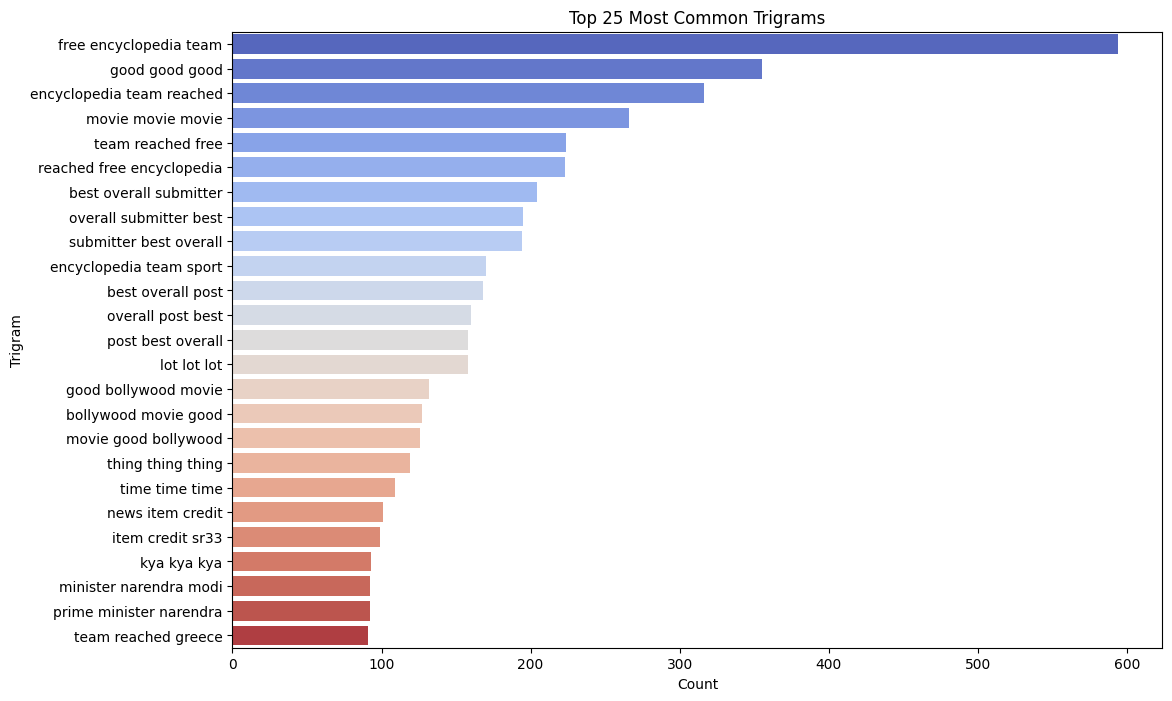

In [45]:
#create a function to extract the top 25 trigrams
def get_top_trigrams(corpus,n=None):
  vec=CountVectorizer(ngram_range=(3,3), stop_words='english').fit(corpus)
  bag_of_words=vec.transform(corpus)
  sum_words=bag_of_words.sum(axis=0)
  words_freq = [(word,sum_words[0,idx]) for word,idx in vec.vocabulary_.items()]
  words_freq=sorted(words_freq,key=lambda x: x[1], reverse=True)
  return words_freq[:n]

# Get the top 25 trigrams
top_25_trigrams = get_top_trigrams(df['clean_comment'], 25)

# Convert the trigrams to DataFrame for plotting
top_25_trigrams_df = pd.DataFrame(
    top_25_trigrams,
    columns=['trigram', 'count']
)

# Plot the countplot for the top 25 trigrams
plt.figure(figsize=(12, 8))
sns.barplot(
    data=top_25_trigrams_df,
    x='count',
    y='trigram',
    palette='coolwarm'
)
plt.title('Top 25 Most Common Trigrams')
plt.xlabel('Count')
plt.ylabel('Trigram')
plt.show()

In [46]:
# remove the non-english characters for the 'clean_comment' column
# keep only standard english letters, digits, and common punctuation

import re

df['clean_comment']=df['clean_comment'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s!?.,]', '', str(x)))
df.head()

,clean_comment,category,word_count,num_stop_words,nums_chars,num_punctuation_chars
0,family mormon never tried explain still stare ...,1,26,0,196,0
1,buddhism much lot compatible christianity espe...,1,140,3,981,0
2,seriously say thing first get complex explain ...,-1,46,0,275,0
3,learned want teach different focus goal not wr...,0,15,1,101,0
4,benefit may want read living buddha living chr...,1,68,1,473,0


In [47]:
all_text=' '.join(df['clean_comment'])

#count the frequency of each character
char_frequency=Counter(all_text)

#convert the character frequency into a dataframe for a better display
char_frequency_df=pd.DataFrame(char_frequency.items(),columns=['character','frequency']).sort_values(by='frequency',ascending=False)
char_frequency_df

,character,frequency
6,,738272
10,e,494884
1,a,365250
3,i,342812
12,t,322572
9,n,317572
7,o,290894
8,r,268331
16,s,223259
4,l,217592


In [48]:
df.head()

,clean_comment,category,word_count,num_stop_words,nums_chars,num_punctuation_chars
0,family mormon never tried explain still stare ...,1,26,0,196,0
1,buddhism much lot compatible christianity espe...,1,140,3,981,0
2,seriously say thing first get complex explain ...,-1,46,0,275,0
3,learned want teach different focus goal not wr...,0,15,1,101,0
4,benefit may want read living buddha living chr...,1,68,1,473,0


In [49]:
from nltk.corpus import stopwords

# Defining stop words but keeping essentials ones for sentiment analysis
stop_words= set(stopwords.words('english'))-{'not','but','however','no','yet'}

#remove stop words from clean comment column retaining essential ones
df['clean_comment']=df['clean_comment'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))
df.head()

,clean_comment,category,word_count,num_stop_words,nums_chars,num_punctuation_chars
0,family mormon never tried explain still stare ...,1,26,0,196,0
1,buddhism much lot compatible christianity espe...,1,140,3,981,0
2,seriously say thing first get complex explain ...,-1,46,0,275,0
3,learned want teach different focus goal not wr...,0,15,1,101,0
4,benefit may want read living buddha living chr...,1,68,1,473,0


In [50]:
df.head()

,clean_comment,category,word_count,num_stop_words,nums_chars,num_punctuation_chars
0,family mormon never tried explain still stare ...,1,26,0,196,0
1,buddhism much lot compatible christianity espe...,1,140,3,981,0
2,seriously say thing first get complex explain ...,-1,46,0,275,0
3,learned want teach different focus goal not wr...,0,15,1,101,0
4,benefit may want read living buddha living chr...,1,68,1,473,0


In [51]:
import nltk
from nltk.stem import WordNetLemmatizer

# Download WordNet
nltk.download('wordnet')

# Define the lemmatizer
lemmatizer = WordNetLemmatizer()

# Apply lemmatization to the clean_comment column
df['clean_comment'] = df['clean_comment'].apply(
    lambda x: ' '.join(
        [lemmatizer.lemmatize(word) for word in x.split()]
    )
)

# Preview the result
df.head()


[nltk_data] Downloading package wordnet to /root/nltk_data...


,clean_comment,category,word_count,num_stop_words,nums_chars,num_punctuation_chars
0,family mormon never tried explain still stare ...,1,26,0,196,0
1,buddhism much lot compatible christianity espe...,1,140,3,981,0
2,seriously say thing first get complex explain ...,-1,46,0,275,0
3,learned want teach different focus goal not wr...,0,15,1,101,0
4,benefit may want read living buddha living chr...,1,68,1,473,0


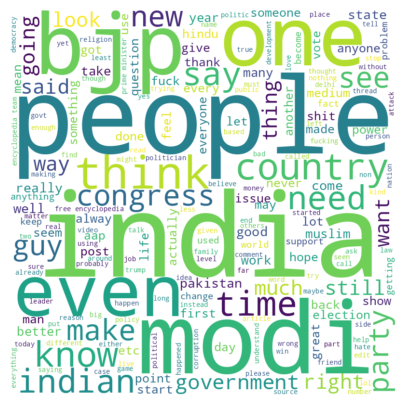

In [52]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
  wordcloud= WordCloud(width=800,height=800,background_color='white').generate(' '.join(text))
  plt.figure(figsize=(10,5))
  plt.imshow(wordcloud,interpolation='bilinear')
  plt.axis("off")
  plt.show()

plot_word_cloud(df['clean_comment'])

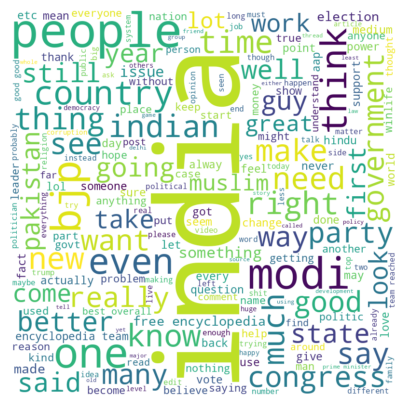

In [53]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
  wordcloud= WordCloud(width=800,height=800,background_color='white').generate(' '.join(text))
  plt.figure(figsize=(10,5))
  plt.imshow(wordcloud,interpolation='bilinear')
  plt.axis("off")
  plt.show()

plot_word_cloud(df[df['category']==1]['clean_comment'])

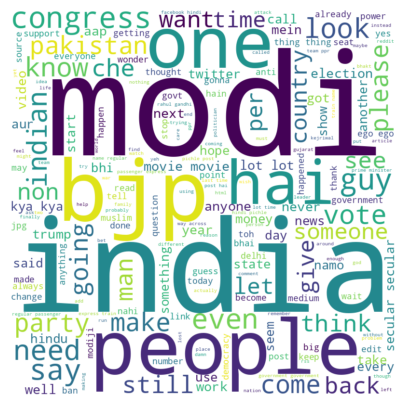

In [54]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
  wordcloud= WordCloud(width=800,height=800,background_color='white').generate(' '.join(text))
  plt.figure(figsize=(10,5))
  plt.imshow(wordcloud,interpolation='bilinear')
  plt.axis("off")
  plt.show()

plot_word_cloud(df[df['category']==0]['clean_comment'])

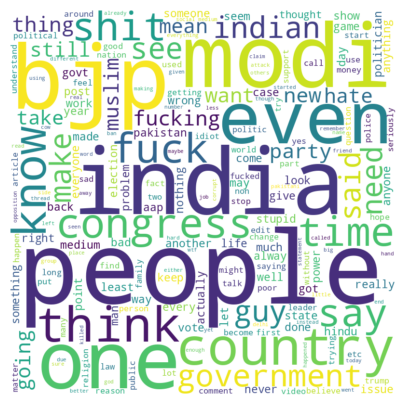

In [55]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
  wordcloud= WordCloud(width=800,height=800,background_color='white').generate(' '.join(text))
  plt.figure(figsize=(10,5))
  plt.imshow(wordcloud,interpolation='bilinear')
  plt.axis("off")
  plt.show()

plot_word_cloud(df[df['category']==-1]['clean_comment'])

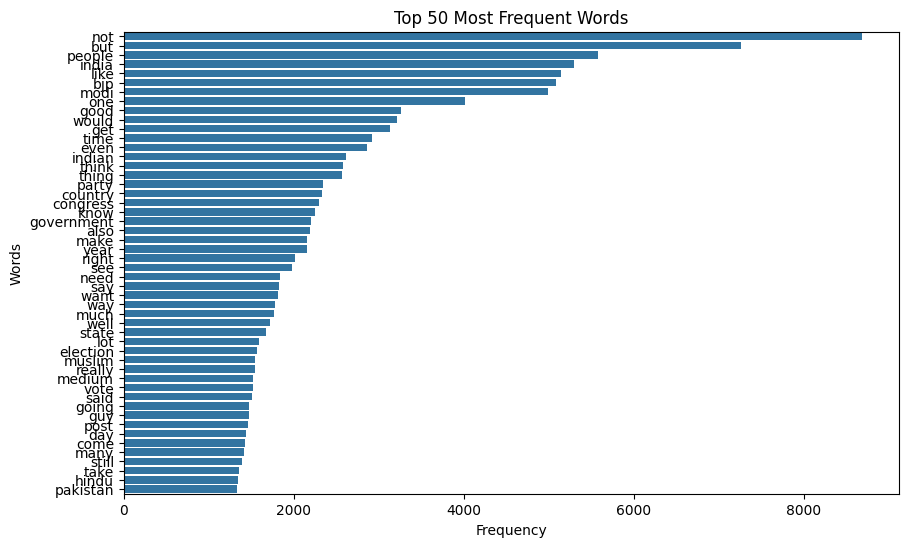

In [56]:
def plot_top_n_words(df, n=20):
    """Plot the top N most frequent words in the dataset."""

    # Flatten all words in the clean_comment column
    words = ' '.join(df['clean_comment']).split()

    # Get the top N most common words
    counter = Counter(words)
    most_common_words = counter.most_common(n)

    # Split words and counts for plotting
    words, counts = zip(*most_common_words)

    # Plot the top N words
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(counts), y=list(words))
    plt.title(f'Top {n} Most Frequent Words')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.show()

#Example usage
plot_top_n_words(df, n=50)


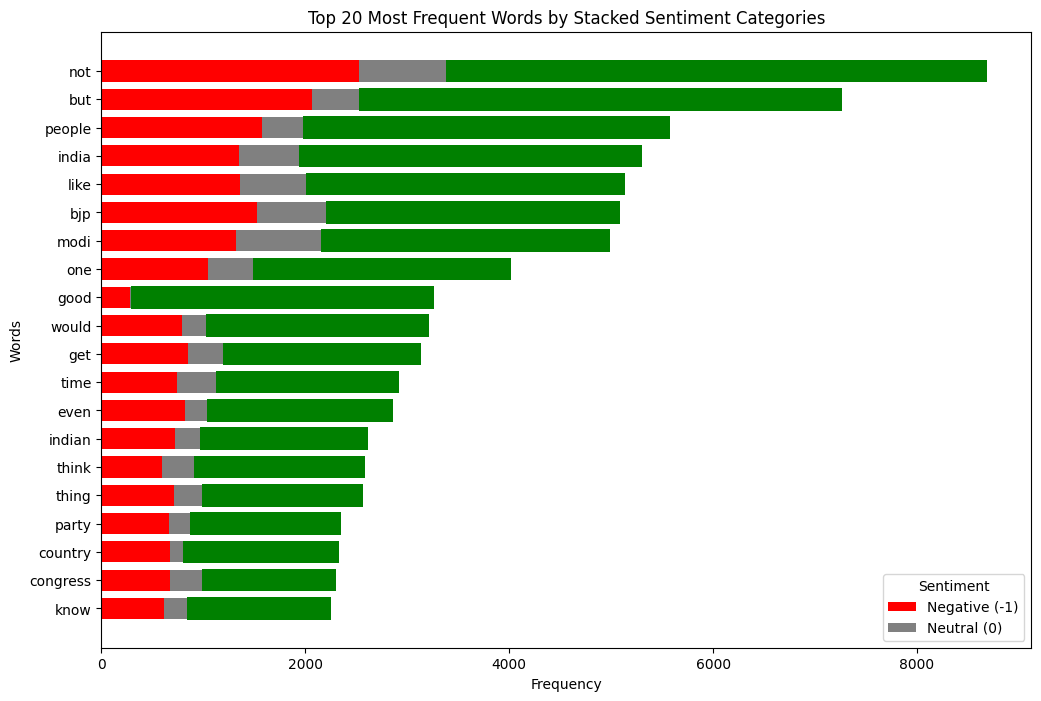

In [57]:
def plot_top_n_words_by_category(df, n=20, start=0):
    """
    Plot the top N most frequent words in the dataset with stacked hue
    based on sentiment category.
    """

    # Flatten all the word in the content colulmn and count their occurences by category-i.e. Dictionary to store word counts per category
    word_category_counts = {}

    # Iterate over rows
    for _, row in df.iterrows():
        words = row['clean_comment'].split()
        category = row['category']  # assuming categories are -1, 0, 1

        for word in words:
            if word not in word_category_counts:
                # Initialize counts for each category
                word_category_counts[word] = {-1: 0, 0: 0, 1: 0} #initialise counts for each sentiment category

            # Increment the count for the corresponding sentiment category
            word_category_counts[word][category] += 1

    # Total count per word
    total_word_counts = {
        word: sum(counts.values())
        for word, counts in word_category_counts.items()
    }

    # get the top N most frequent words across all categories
    most_common_words = sorted(
        total_word_counts.items(),
        key=lambda x: x[1],
        reverse=True)[start:start+n]
    top_words = [word for word, _ in most_common_words]

    # prepare data for plotting
    word_labels=top_words
    negative_counts = [word_category_counts[word][-1] for word in top_words]
    neutral_counts = [word_category_counts[word][0] for word in top_words]
    positive_counts =[word_category_counts[word][1] for word in top_words]

    #Plot the stacked bar chart
    plt.figure(figsize=(12, 8))
    bar_width = 0.75


    # plot negative, neutral, and positive counts in a stacked manner
    plt.barh(
        word_labels,
        negative_counts,
        color='red',
        label='Negative (-1)',
        height=bar_width
    )
    plt.barh(
        word_labels,
        neutral_counts,
        left=negative_counts,
        color='gray',
        label='Neutral (0)',
        height=bar_width
    )
    plt.barh(
        word_labels,
        positive_counts,
        left=[i+j for i,j in zip(negative_counts, neutral_counts)],
        color='green'
    )

    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title(f'Top {n} Most Frequent Words by Stacked Sentiment Categories')
    plt.legend(title='Sentiment',loc='lower right')
    plt.gca().invert_yaxis() # Invert y-axis to show the highest frequency at the top
    plt.show()

plot_top_n_words_by_category(df, n=20)